<a href="https://colab.research.google.com/github/WaithiraNgatia/flood-detection-model/blob/main/Flood_Detection_Model_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing
Here, to make our data viable for modelling and training, the following steps shall be applied:

* Load the images from the train and valid folders.
* Assign labels based on the folder structure (0 for not flooded, 1 for flooded)
* Resize the images to a uniform size (e.g., 224x224 pixels).
* Normalize the pixel values(Between 0 and 1)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing necessary libraries
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator #To load images from the train and valid folders
from pathlib import Path #Library to handle file paths
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# **About Data**
The dataset contains aerial images of areas.
It is divided into train and valid folders. Each contains the same subfolders, where 0 and 1 is used to label the data. A label of 0 indicates the area shown in the image is not flooded, while a label of 1 indicates the area shown in the image is flooded.
The images in the dataset itself has been organized as follows:

    If no underscore is in the file name, the image shows the area before or after the flood.

    If an underscore is in the file name, the image shows the area during the flood:

    If a zero follows the underscore, the area was not flooded.
    If a one follows the underscore, the area was flooded.

In [ ]:
from pathlib import Path

# Defining file path
data_dir = Path("/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset")

# Defining subdirectory names for training and validation data
train_dir = "train"
valid_dir = "test"

# Finding training image paths
train_image_paths = sorted(data_dir.joinpath(train_dir).rglob("*.png"))

# Finding validation image paths
valid_image_paths = sorted(data_dir.joinpath(valid_dir).rglob("*.png"))

# Count the number of elements in the defined lists
len(train_image_paths), len(valid_image_paths)


(270, 52)

In [ ]:
from pathlib import Path

# Defining file path
data_dir = Path("/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset")

# Defining subdirectory names for training and validation data
train_dir = "train"
valid_dir = "test"

# Finding training image paths
train_image_paths = sorted(data_dir.joinpath(train_dir).rglob("*.png"))
print("Train Image Paths:", train_image_paths)

valid_image_paths = sorted(data_dir.joinpath(valid_dir).rglob("*.png"))
print("Validation Image Paths:", valid_image_paths)

# Count the number of elements in the defined lists, i.e., train_image_paths, valid_image_paths
print("Number of training images:", len(train_image_paths))
print("Number of validation images:", len(valid_image_paths))


Train Image Paths: [PosixPath('/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/1000.png'), PosixPath('/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/10000.png'), PosixPath('/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/10000_0.png'), PosixPath('/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/10001.png'), PosixPath('/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/10001_0.png'), PosixPath('/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/10002.png'), PosixPath('/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/10002_0.png'), PosixPath('/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/10003.png'), PosixPath('/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/10003_1.png'), PosixPath('/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/10004.png'), PosixPath('/content/dri

In [ ]:
from pathlib import Path

# Define the base directory
data_dir = Path("/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset")

# Defining subdirectory names for training and validation data
train_dir = "train"
valid_dir = "test"

# Finding training image paths
train_image_paths = list(data_dir.joinpath(train_dir).rglob("*.png"))

# Finding validation image paths
valid_image_paths = list(data_dir.joinpath(valid_dir).rglob("*.png"))

# Count the number of elements in the defined lists
num_train_images = len(train_image_paths)
num_valid_images = len(valid_image_paths)

# Print the counts to verify
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")


Number of training images: 270
Number of validation images: 52


                                            filename  label
0  /content/drive/MyDrive/Capstone Project/Flood ...      0
1  /content/drive/MyDrive/Capstone Project/Flood ...      0
2  /content/drive/MyDrive/Capstone Project/Flood ...      1
3  /content/drive/MyDrive/Capstone Project/Flood ...      0
4  /content/drive/MyDrive/Capstone Project/Flood ...      0
                                            filename  label
0  /content/drive/MyDrive/Capstone Project/Flood ...      0
1  /content/drive/MyDrive/Capstone Project/Flood ...      0
2  /content/drive/MyDrive/Capstone Project/Flood ...      1
3  /content/drive/MyDrive/Capstone Project/Flood ...      1
4  /content/drive/MyDrive/Capstone Project/Flood ...      1


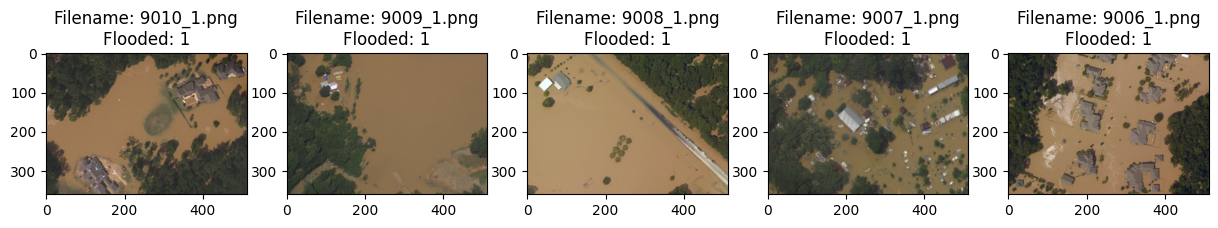

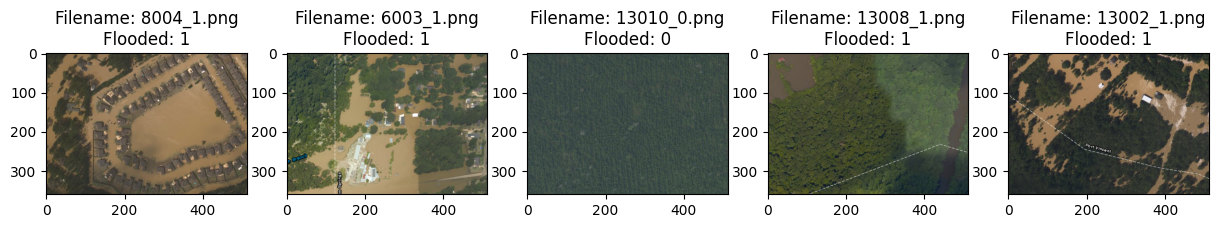

In [ ]:
# Function to extract labels from filenames
def extract_labels(filename):
    if '_0.png' in filename:
        return 0  # Not flooded
    elif '_1.png' in filename:
        return 1  # Flooded
    else:
        return None  # Image taken before or after the flood

# Function to create a DataFrame with filenames and labels
def create_dataframe(image_paths):
    image_data = []
    for image_path in image_paths:
        label = extract_labels(image_path.name)
        if label is not None:
            image_data.append({'filename': str(image_path), 'label': label})
    return pd.DataFrame(image_data)

# Create DataFrames for train and valid datasets
train_df = create_dataframe(train_image_paths)
valid_df = create_dataframe(valid_image_paths)

# Print DataFrames to check
print(train_df.head())
print(valid_df.head())

# Function to display images with labels
def display_images_with_labels(df, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for ax, (_, row) in zip(axes, df.iterrows()):
        img_path = row['filename']
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.set_title(f"Filename: {Path(img_path).name}\nFlooded: {row['label']}")
        ax.axis('on')
    plt.show()

# Display some train images with labels
display_images_with_labels(train_df.tail())

# Display some valid images with labels
display_images_with_labels(valid_df.tail())


In [ ]:
# Function to get the pixel sizes of images
def get_image_sizes(image_paths):
    sizes = []
    for image_path in image_paths:
        img = Image.open(image_path)
        sizes.append(img.size)
    return sizes

# Get the pixel sizes of all train images
train_image_sizes = get_image_sizes(train_image_paths)

# Get the pixel sizes of all valid images
valid_image_sizes = get_image_sizes(valid_image_paths)

# Find the highest and lowest pixel sizes for train images
train_max_size = np.max(train_image_sizes)
train_min_size = np.min(train_image_sizes)

# Find the highest and lowest pixel sizes for valid images
valid_max_size = np.max(valid_image_sizes)
valid_min_size = np.min(valid_image_sizes)

print("Train Images:")
print(f"Highest pixel size: {train_max_size}")
print(f"Lowest pixel size: {train_min_size}")

print("\nValid Images:")
print(f"Highest pixel size: {valid_max_size}")
print(f"Lowest pixel size: {valid_min_size}")


Train Images:
Highest pixel size: 512
Lowest pixel size: 360

Valid Images:
Highest pixel size: 512
Lowest pixel size: 360


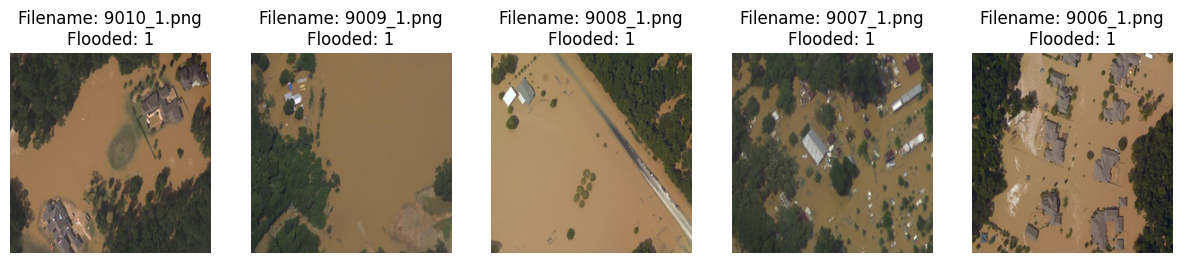

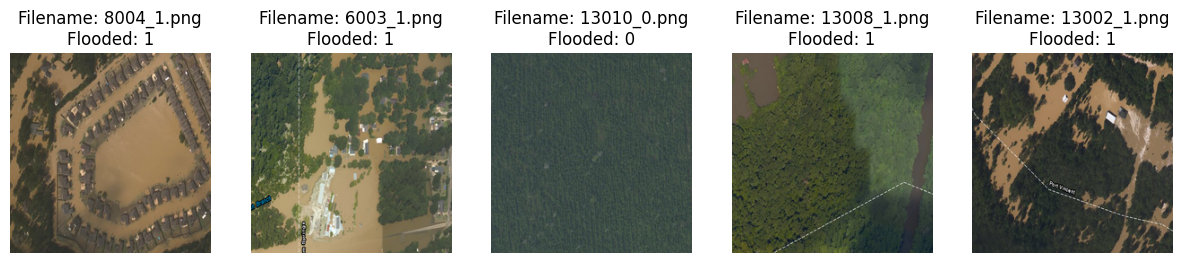

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# Function to resize the images
def resize_image(img_path, target_size=(224, 224)):
    img = Image.open(img_path)
    img = img.resize(target_size, Image.LANCZOS)
    return img

# Function to display resized images with labels
def display_resized_images_with_labels(df, num_images=5, target_size=(224, 224)):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for ax, (_, row) in zip(axes, df.iterrows()):
        img_path = row['filename']
        img = resize_image(img_path, target_size)
        ax.imshow(img)
        ax.set_title(f"Filename: {Path(img_path).name}\nFlooded: {row['label']}")
        ax.axis('off')  # Turn off the axis
    plt.show()

# Displaying some resized train images with labels
display_resized_images_with_labels(train_df.tail())

# Displaying some resized valid images with labels
display_resized_images_with_labels(valid_df.tail())


In [ ]:
# Function to get the pixel sizes of resized images
def get_resized_image_sizes(image_paths, target_size=(224, 224)):
    sizes = []
    for image_path in image_paths:
        img = resize_image(image_path, target_size)
        sizes.append(img.size)
    return sizes

# Get the pixel sizes of resized train images
train_resized_sizes = get_resized_image_sizes(train_image_paths)

# Get the pixel sizes of resized valid images
valid_resized_sizes = get_resized_image_sizes(valid_image_paths)

# Find the highest and lowest pixel sizes for resized train images
train_resized_max_size = np.max(train_resized_sizes)
train_resized_min_size = np.min(train_resized_sizes)

# Find the highest and lowest pixel sizes for resized valid images
valid_resized_max_size = np.max(valid_resized_sizes)
valid_resized_min_size = np.min(valid_resized_sizes)

print("Train Resized Images:")
print(f"Highest pixel size: {train_resized_max_size}")
print(f"Lowest pixel size: {train_resized_min_size}")

print("\nValid Resized Images:")
print(f"Highest pixel size: {valid_resized_max_size}")
print(f"Lowest pixel size: {valid_resized_min_size}")


Train Resized Images:
Highest pixel size: 224
Lowest pixel size: 224

Valid Resized Images:
Highest pixel size: 224
Lowest pixel size: 224


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/9010_1.png'

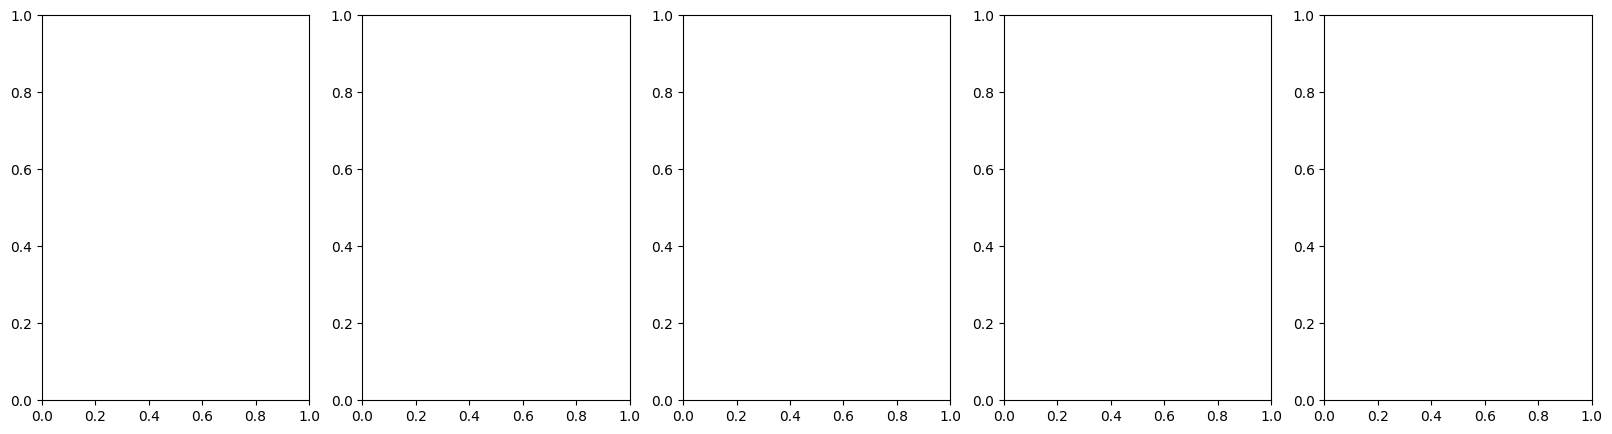

In [ ]:
# Function to normalize images
def normalize_image(img):
    # Convert image to numpy array
    img_array = np.array(img)
    # Normalize pixel values to range [0, 1]
    img_normalized = img_array / 255.0
    return img_normalized

# Function to resize and normalize images with labels
def display_resized_normalized_images_with_labels(df, num_images=5, target_size=(224, 224)):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for ax, (_, row) in zip(axes, df.iterrows()):
        img_path = row['filename']
        img = resize_image(img_path, target_size)
        img_normalized = normalize_image(img)
        ax.imshow(img_normalized)
        ax.set_title(f"Filename: {Path(img_path).name}\nFlooded: {row['label']}")
        ax.axis('off')
    plt.show()

# Displaying some resized and normalized train images with labels
display_resized_normalized_images_with_labels(train_df.tail())

# Displaying some resized and normalized valid images with labels
display_resized_normalized_images_with_labels(valid_df.tail())


In [ ]:
import os
import shutil
from pathlib import Path

# Define the base directory containing the train and test folders
base_dir = Path("/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset")

# Define the paths to the train and test directories
train_dir = base_dir / "train"
valid_dir = base_dir / "test"

# Function to categorize files
def categorize_files(src_dir):
    flooded_dir = src_dir / 'flooded'
    not_flooded_dir = src_dir / 'not_flooded'
    normal_dir = src_dir / 'normal'

    # Create directories if they don't exist
    os.makedirs(flooded_dir, exist_ok=True)
    os.makedirs(not_flooded_dir, exist_ok=True)
    os.makedirs(normal_dir, exist_ok=True)

    # Debug: Print all files in the source directory before processing
    print(f"Listing all files in {src_dir}:")
    for file in src_dir.rglob('*.png'):  # Use rglob to search recursively within train or test folders
        print(file)

    # Move files to corresponding directories
    for img_path in src_dir.rglob('*.png'):
        filename = img_path.name
        print(f"Processing file: {filename}")  # Debug statement
        if '_0.png' in filename:
            shutil.move(str(img_path), str(not_flooded_dir / filename))
            print(f"Moved {filename} to not_flooded directory")
        elif '_1.png' in filename:
            shutil.move(str(img_path), str(flooded_dir / filename))
            print(f"Moved {filename} to flooded directory")
        else:
            shutil.move(str(img_path), str(normal_dir / filename))
            print(f"Moved {filename} to normal directory")

# Categorize train and test data
categorize_files(train_dir)
categorize_files(valid_dir)

def verify_categorization(src_dir, dataset_name):
    # Define subdirectory names
    subdirectories = ['flooded', 'not_flooded', 'normal']

    # Loop through subdirectories
    for subdir in subdirectories:
        subdir_path = os.path.join(src_dir, subdir)
        if os.path.exists(subdir_path):
            num_files = len(os.listdir(subdir_path))
            print(f"Number of files in '{subdir}' of {dataset_name}: {num_files}")
        else:
            print(f"Directory '{subdir}' does not exist in {dataset_name}.")

# Verify categorization for train and test directories
verify_categorization(train_dir, "train")
verify_categorization(valid_dir, "test")


Listing all files in /content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train:
/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/flooded/10003_1.png
/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/flooded/11006_1.png
/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/flooded/11001_1.png
/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/flooded/1010_1.png
/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/flooded/11000_1.png
/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/flooded/1007_1.png
/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/flooded/1006_1.png
/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/flooded/1002_1.png
/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/flooded/1001_1.png
/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train/flooded/10010_1.png
/c

Found 135 images belonging to 2 classes.
Found 26 images belonging to 2 classes.
Number of training images: 135
Number of validation images: 26


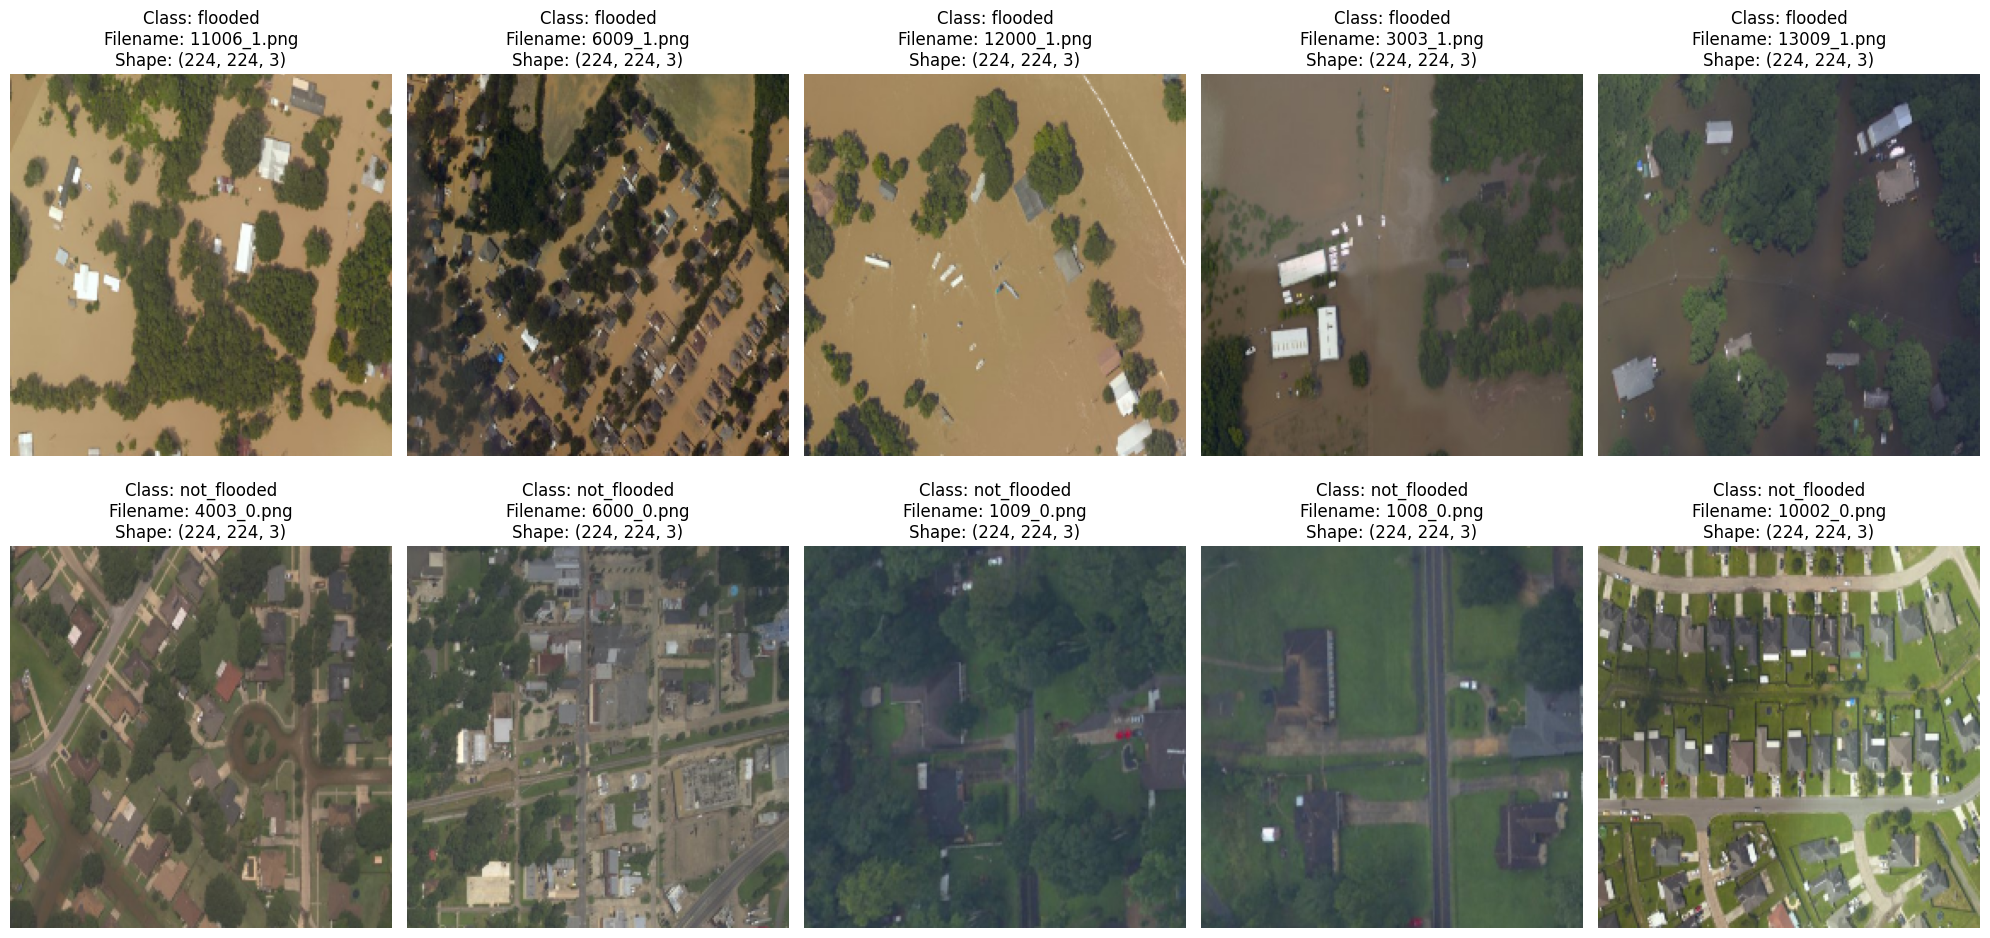

Class 'flooded':
    Filename: 3006_1.png, Data Shape: (224, 224, 3)
    Filename: 6010_1.png, Data Shape: (224, 224, 3)
    Filename: 2003_1.png, Data Shape: (224, 224, 3)
    Filename: 13004_1.png, Data Shape: (224, 224, 3)
    Filename: 6005_1.png, Data Shape: (224, 224, 3)
Class 'not_flooded':
    Filename: 4003_0.png, Data Shape: (224, 224, 3)
    Filename: 10001_0.png, Data Shape: (224, 224, 3)
    Filename: 5010_0.png, Data Shape: (224, 224, 3)
    Filename: 7011_0.png, Data Shape: (224, 224, 3)
    Filename: 10002_0.png, Data Shape: (224, 224, 3)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from pathlib import Path
import random # Import the random module

train_datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255  # Rescale pixel values to the range [0, 1]
)

# Define the image generator for validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

# Generate training and validation image generators with resized images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Set target size to (224, 224)
    batch_size=5,
    class_mode='binary',
    classes=['flooded', 'not_flooded'],  # Specify classes to include
    shuffle=True,
    interpolation='nearest'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),  # Set target size to (224, 224)
    batch_size=2,
    class_mode='binary',
    shuffle=False,
    classes=['flooded', 'not_flooded'],
    interpolation='nearest'
)

print(f"Number of training images: {train_generator.samples}")
print(f"Number of validation images: {valid_generator.samples}")

import tensorflow as tf

def display_augmented_images(generator, num_images_per_class=5, target_size=(224, 224)):
    class_indices = {v: k for k, v in generator.class_indices.items()}
    fig, axes = plt.subplots(2, num_images_per_class, figsize=(20, 10))
    axes = axes.flatten()  # Flatten the 2D array into a 1D array for easy iteration
    train_files = {}
    for cls in generator.class_indices.keys():
        train_files[cls] = [f for f in os.listdir(os.path.join(train_dir, cls)) if f.endswith('.png')]

    # Loop through classes and randomly select images
    for i, cls in enumerate(train_files.keys()):
        class_files = train_files[cls]
        random_image_indices = random.sample(range(len(class_files)), num_images_per_class)
        for j, image_index in enumerate(random_image_indices):
            image_path = os.path.join(train_dir, cls, class_files[image_index])
            img = plt.imread(image_path)
            img_resized = tf.image.resize(img, target_size)  # Resize the image to target size
            ax = axes[i * num_images_per_class + j]
            ax.imshow(img_resized)
            class_label = class_indices[i]
            ax.set_title(f"Class: {class_label}\nFilename: {class_files[image_index]}\nShape: {img_resized.shape}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()

    # Print class label, filename, and data shape
    for cls, files in train_files.items():
        print(f"Class '{cls}':")
        random_image_indices = random.sample(range(len(files)), num_images_per_class)
        for image_index in random_image_indices:
            filename = files[image_index]
            image_path = os.path.join(train_dir, cls, filename)
            img = plt.imread(image_path)
            img_resized = tf.image.resize(img, target_size)  # Resize the image to target size
            print(f"    Filename: {filename}, Data Shape: {img_resized.shape}")

# Display augmented train images with debugging information
display_augmented_images(train_generator)


# **Model Selection and Training**



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model with weights trained on ImageNet
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Show the summary of the model
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Get the output tensor of the pre-trained VGG16 model
pretrained_output = model.output

# Flatten the output tensor to feed into a fully connected layer
flatten_layer = Flatten()(pretrained_output)

# Add a fully connected layer with 256 units and ReLU activation
fc1 = Dense(1024, activation='relu')(flatten_layer)

# Add a dropout layer for regularization
dropout = Dropout(0.5)(fc1)

# Add the output layer with 1 unit (binary classification) and sigmoid activation
output_layer = Dense(1, activation='sigmoid')(dropout)

# Combine the pre-trained model with the new Classifier layers
new_model = Model(inputs=model.input, outputs=output_layer)

# Show the summary of the new model
new_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 40,406,849 (154.14 MB)

 Trainable params: 40,406,849 (154.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the new model
new_model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Using Adam optimizer with a low learning rate
    loss='binary_crossentropy',            # Binary cross-entropy loss for binary classification
    metrics=['accuracy']                   # Monitor accuracy during training
)


In [ ]:
pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the ResNet18 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to avoid training them
for layer in base_model.layers:
    layer.trainable = False

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
from pathlib import Path
import matplotlib.pyplot as plt

# Load the MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to avoid training them
for layer in base_model.layers:
    layer.trainable = False

model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    epochs=20,
    callbacks=[early_stopping]
)

# Unfreeze some of the base model layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    epochs=20,
    callbacks=[early_stopping]
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 35s 643ms/step - accuracy: 0.4791 - loss: 1.0300 - val_accuracy: 0.9231 - val_loss: 0.3221
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
# Save the model
model.save('InitialClassification.h5')


# **Severity Classification Task**
# **Classification**

In [ ]:
import os
import cv2
import csv
import matplotlib.pyplot as plt

def classify_images(train_data_dir, test_data_dir):
    """
    Classify flooded images in the train and test directories and save the results to a single CSV file.
    """
    # Define a function to segment water
    def segment_water(image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
        return mask

    # Define a function to extract features
    def extract_features(image):
        water_area = cv2.countNonZero(image)
        total_area = image.shape[0] * image.shape[1]
        water_ratio = water_area / total_area
        if water_ratio < 0.1:
            severity = "Low"
        elif water_ratio < 0.5:
            severity = "Medium"
        else:
            severity = "High"
        return {"water_area": water_area, "severity": severity}

    # Define a function to process images in a directory
    def process_images_in_directory(directory):
        classified_data = []

        # Get the path to the "flooded" subdirectory
        flooded_dir = os.path.join(directory, "flooded")

        # Check if the "flooded" subdirectory exists
        if not os.path.exists(flooded_dir):
            print(f"No 'flooded' directory found in: {directory}")
            return classified_data

        # Iterate through all files in the "flooded" subdirectory
        for file in os.listdir(flooded_dir):
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                # Load the image
                image_path = os.path.join(flooded_dir, file)
                image = cv2.imread(image_path)

                # Check if the image is loaded successfully
                if image is not None:
                    # Segment water
                    mask = segment_water(image)

                    # Extract features
                    features = extract_features(mask)

                    # Extract filename without full path
                    filename = os.path.basename(image_path)

                    # Append filename, water area, severity, image, and mask to the classified data list
                    classified_data.append((filename, features['water_area'], features['severity'], image, mask))

        return classified_data

    # Process images in the train directory
    train_classified_data = process_images_in_directory(train_data_dir)

    # Process images in the test directory
    test_classified_data = process_images_in_directory(test_data_dir)

    # Combine the classified data from both directories
    all_classified_data = train_classified_data + test_classified_data

    # Save the combined classified dataset to a CSV file
    csv_file_path = os.path.join(os.path.dirname(train_data_dir), 'all_classified_dataset.csv')
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Filename', 'Water Area', 'Severity'])
        writer.writerows([(data[0], data[1], data[2]) for data in all_classified_data])

    print("Classification data saved to:", csv_file_path)
    print("Number of files classified and saved to CSV:", len(all_classified_data))

    # Return all classified data
    return all_classified_data

def display_image(image, title):
    """
    Display an image using matplotlib.
    """
    plt.figure(figsize=(5, 5))
    if len(image.shape) == 2:  # Grayscale image
        plt.imshow(image, cmap='gray')
    else:  # Color image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage
train_data_dir = "/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train"
test_data_dir = "/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/test"

all_classified_data = classify_images(train_data_dir, test_data_dir)

# Print water area, severity, and display images for the first few images
for data in all_classified_data[:5]:
    filename, water_area, severity, image, mask = data
    print("Filename:", filename)
    print("Water Area:", water_area)
    print("Severity:", severity)
    display_image(image, "Original Image")
    display_image(mask, "Segmented Image")


# **Training and evaluating model**

**Data Preparation**

In [ ]:
import os
import cv2
import csv

def classify_images(train_data_dir, test_data_dir):
    """
    Classify flooded images in the train and test directories and save the results to a single CSV file.
    """
    # Define a function to segment water
    def segment_water(image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
        return mask

    # Define a function to extract features
    def extract_features(image):
        water_area = cv2.countNonZero(image)
        total_area = image.shape[0] * image.shape[1]
        water_ratio = water_area / total_area
        if water_ratio < 0.1:
            severity = "Low"
        elif water_ratio < 0.5:
            severity = "Medium"
        else:
            severity = "High"
        return {"water_area": water_area, "severity": severity}

    # Define a function to process images in a directory
    def process_images_in_directory(directory):
        classified_data = []

        # Get the path to the "flooded" subdirectory
        flooded_dir = os.path.join(directory, "flooded")

        # Iterate through all files in the "flooded" subdirectory
        for file in os.listdir(flooded_dir):
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                # Load the image
                image_path = os.path.join(flooded_dir, file)
                image = cv2.imread(image_path)

                # Check if the image is loaded successfully
                if image is not None:
                    # Segment water
                    mask = segment_water(image)

                    # Extract features
                    features = extract_features(mask)

                    # Extract filename without full path
                    filename = os.path.basename(image_path)

                    # Append filename, water area, and severity to the classified data list
                    classified_data.append((filename, features['water_area'], features['severity']))

        return classified_data

    # Process images in the train directory
    train_classified_data = process_images_in_directory(train_data_dir)

    # Process images in the test directory
    test_classified_data = process_images_in_directory(test_data_dir)

    # Combine the classified data from both directories
    all_classified_data = train_classified_data + test_classified_data

    # Save the combined classified dataset to a CSV file
    csv_file_path = os.path.join(os.path.dirname(train_data_dir), 'all_classified_dataset.csv')
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Filename', 'Water Area', 'Severity'])
        writer.writerows(all_classified_data)

    print("Classification data saved to:", csv_file_path)
    print("Number of files classified and saved to CSV:", len(all_classified_data))

# Example usage
train_data_dir = "/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/train"
test_data_dir = "/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/test"

classify_images(train_data_dir, test_data_dir)


In [ ]:
import csv
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.impute import SimpleImputer

def load_data_from_csv(csv_path):
    """Loads data from CSV with pre-computed features."""
    data = []
    with open(csv_path, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            try:
                water_area = float(row["Water Area"])  # Assuming space in column name
                # Handle NaN values if any
                if np.isnan(water_area):
                    continue  # Skip this row if water_area is NaN
            except ValueError:
                continue  # Skip rows where Water Area cannot be converted to float

            features = {
                "water_area": water_area,
                "water_ratio": None,  # Assuming not provided
                "avg_flood_intensity": None  # Assuming not provided
            }
            features["Severity"] = row["Severity"]
            data.append(features)

    return data

def train_and_evaluate(data):
    """Trains a Random Forest model and evaluates its performance."""
    # Check if water_ratio and avg_flood_intensity are available (adjust based on your data)
    if all(feature in data[0] for feature in ["water_ratio", "avg_flood_intensity"]):
        X = np.array([(item["water_area"], item["water_ratio"], item["avg_flood_intensity"]) for item in data])
    else:
        print("Warning: Features 'water_ratio' and 'avg_flood_intensity' not found in all data points. Using 'water_area' only.")
        X = np.array([item["water_area"] for item in data]).reshape(-1, 1)

    y = np.array([item["Severity"] for item in data])

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Train-test split (consider using a separate validation set for better evaluation)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Make predictions on testing data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

# Define path for CSV
csv_path = "/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/all_classified_dataset.csv"

# Load data, train, and evaluate
data = load_data_from_csv(csv_path)
train_and_evaluate(data)


Accuracy: 1.0
F1 Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [1 2]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
import os
import pandas as pd

# Define the base directory
base_dir = '/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/'

# Function to check if file exists in both train and test directories
def check_file_exists(filename):
    train_path = os.path.join(base_dir, 'train', 'flooded', filename)
    test_path = os.path.join(base_dir, 'test', 'flooded', filename)

    train_exists = os.path.exists(train_path)
    test_exists = os.path.exists(test_path)

    if train_exists and test_exists:
        return "Found in both train and test"
    elif train_exists:
        return "Found only in train"
    elif test_exists:
        return "Found only in test"
    else:
        return "Not found in either train or test"

# Load filenames from CSV
csv_file = '/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/all_classified_dataset.csv'

df = pd.read_csv(csv_file)

# Extract filenames from the DataFrame
filenames = df['Filename'].tolist()

# Check each filename
for filename in filenames:
    result = check_file_exists(filename)
    print(f"Checking file: {filename} - {result}")


In [ ]:
import pandas as pd

# Example CSV path
csv_path = "/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/all_classified_dataset.csv"

# Load CSV into a DataFrame
df = pd.read_csv(csv_path)

# Remove leading and trailing whitespaces from filenames
df['Filename'] = df['Filename'].str.strip()

# Save the cleaned DataFrame back to CSV if needed
cleaned_csv_path = "/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/cleaned_dataset.csv"
df.to_csv(cleaned_csv_path, index=False)

# Optionally, print the cleaned DataFrame to verify
print(df.head())


In [ ]:
import os
import pandas as pd

# Define the base directory
base_dir = '/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/'

# Function to check if file exists in both train and test directories
def check_file_exists(filename):
    train_path = os.path.join(base_dir, 'train', 'flooded', filename)
    test_path = os.path.join(base_dir, 'test', 'flooded', filename)

    train_exists = os.path.exists(train_path)
    test_exists = os.path.exists(test_path)

    if train_exists and test_exists:
        return "Found in both train and test"
    elif train_exists:
        return "Found only in train"
    elif test_exists:
        return "Found only in test"
    else:
        return "Not found in either train or test"

# Load filenames from CSV
csv_file = '/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/all_classified_dataset.csv'

df = pd.read_csv(csv_file)

# Strip whitespace from filenames if necessary
df['Filename'] = df['Filename'].str.strip()

# Extract filenames from the DataFrame
filenames = df['Filename'].tolist()

# Check each filename
for filename in filenames:
    result = check_file_exists(filename)
    print(f"Checking file: {filename} - {result}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load your dataset and prepare features and labels
csv_path = "/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/all_classified_dataset.csv"
df = pd.read_csv(csv_path)

# Assuming 'water area' and 'severity' are features
X = df[['Water Area']].values
y = df['Severity'].values

# Encode severity labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Convert labels to numeric values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train SVM Classifier (using One-vs-One strategy)
svm_Classifier = SVC(kernel='linear', decision_function_shape='ovo')  # Example with linear kernel and OvO strategy
svm_Classifier.fit(X_train, y_train)

# Predict on test data
y_pred = svm_Classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load your dataset (replace with your actual data loading)
csv_path = "/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/all_classified_dataset.csv"
df = pd.read_csv(csv_path)

# Assuming 'Water Area' is a feature and 'Severity' is the target variable
X = df[['Water Area']].values
y = df['Severity'].values

# Convert categorical labels to numerical categories
class_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
y = np.array([class_mapping[label] for label in y])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to categorical format
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the shallow neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer with 3 neurons for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=5, validation_data=(X_test, y_test_cat))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

# Example: Predictions on new data
# y_pred = model.predict(X_new_data)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Load your dataset (replace with your actual data loading)
csv_path = "/content/drive/MyDrive/Capstone Project/Flood Classifier Dataset/all_classified_dataset.csv"
df = pd.read_csv(csv_path)

# Assuming 'Water Area' is a feature and 'Severity' is the target variable
X = df[['Water Area']].values
y = df['Severity'].values

# Convert categorical labels to numerical categories
class_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
y = np.array([class_mapping[label] for label in y])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to categorical format
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the tuned neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer with 3 neurons for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Train the model
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=10,
                    validation_data=(X_test, y_test_cat),
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

# Example: Predictions on new data
# y_pred = model.predict(X_new_data)


In [ ]:
# Save the model
model.save('Severity.h5')


In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(10, 6))

# Plot training & validation accuracy values
plt.subplot(211)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(212)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


# **User Interface Integration**

In [ ]:
!pip install streamlit


In [ ]:
import os

# Define the root directory for searching
root_dir = '/content'

# Walk through the directory and its subdirectories
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.h5'):
            print(os.path.join(root, file))


In [ ]:
!pip install pyngrok


In [ ]:
import streamlit as st
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load models
flood_model_path = '/content/InitialClassification.h5'
severity_model_path = '/content/Severity.h5'

flood_model = load_model(flood_model_path)
severity_model = load_model(severity_model_path)

# Function to preprocess input data
def preprocess_input_data(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

# Function to predict flood classification
def predict_flood_classification(data):
    processed_data = preprocess_input_data(data)
    prediction = flood_model.predict(processed_data)
    return prediction

# Function to predict severity classification
def predict_severity_classification(data):
    processed_data = preprocess_input_data(data)
    prediction = severity_model.predict(processed_data)
    return prediction


In [ ]:
%%writefile app.py
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

# Load models
flood_model_path = '/content/InitialClassification.h5'
severity_model_path = '/content/Severity.h5'

flood_model = load_model(flood_model_path)
severity_model = load_model(severity_model_path)

# Function to preprocess input image
def preprocess_input_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize image to match model's expected sizing
    img = img / 255.0  # Rescale pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match model's expected input shape
    return img

# Function to predict flood classification
def predict_flood_classification(img):
    processed_img = preprocess_input_image(img)
    prediction = flood_model.predict(processed_img)
    return prediction

# Function to predict severity classification
def predict_severity_classification(img):
    processed_img = preprocess_input_image(img)
    prediction = severity_model.predict(processed_img)
    return prediction

# Streamlit app
def main():
    st.title('Flood Detection and Severity App')
    st.write('Upload an image to predict flood classification and severity.')

    uploaded_file = st.file_uploader('Choose an image...', type=['jpg', 'jpeg', 'png'])

    if uploaded_file is not None:
        # Display the uploaded image
        img = image.load_img(uploaded_file, target_size=(224, 224))
        st.image(img, caption='Uploaded Image.', use_column_width=True)

        # Make predictions on the uploaded image
        if st.button('Predict'):
            # Convert uploaded image to array
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            # Predictions
            flood_prediction = predict_flood_classification(img_array)
            severity_prediction = predict_severity_classification(img_array)

            # Display predictions
            st.write(f'Flood Classification Prediction: {flood_prediction}')
            st.write(f'Severity Classification Prediction: {severity_prediction}')

if __name__ == '__main__':
    main()


In [ ]:
from pyngrok import ngrok

# Start Streamlit server on port 8501
!streamlit run --server.port 8501 'Flood Detection Model.py' &> run.log &

# Wait for 2 seconds to ensure that the Streamlit server has started
import time
time.sleep(2)

# Setup a tunnel to the Streamlit port 8501
public_url = ngrok.connect(addr="8501")
print(f'Streamlit app is running at: {public_url}')
